### Read Imaris ims formatted files.

In [1]:
import h5py
import os 
import seaborn as sns
import pandas as pd
# Path to ims file
path = '/home/bcardoen/SFUVault/Shared/SuperResolution/Data/Rory/3dsegmentation'
fname = 'NS4B2_ZIKV_KDEL_Rep2_May12018_2.ims'

In [2]:
# Load data
f = h5py.File(os.path.join(path,fname), 'r')

In [3]:
print('IMS file {} in {} has following entries:'.format(fname, path))
print(' '.join(f.keys()))

IMS file NS4B2_ZIKV_KDEL_Rep2_May12018_2.ims in /home/bcardoen/SFUVault/Shared/SuperResolution/Data/Rory/3dsegmentation has following entries:
DataSetInfo DataSetTimes Scene8 Scene DataSet


In [4]:
# Metadata
print('MetaData Entries:')
d = f['DataSetInfo']
print(' '.join(d.keys()))
for kd in d.keys():
    c = d[kd]
    if c.keys():
        print('Entry {} has {} keys'.format(kd, list(c.keys())))
    else:
        print('Entry {} has no further information.'.format(kd))

MetaData Entries:
Image Dimension Z Dimension X TimeInfo Dimension Y Channel 2 Channel 1 ImarisDataSet Channel 0 Log Imaris
Entry Image has no further information.
Entry Dimension Z has no further information.
Entry Dimension X has no further information.
Entry TimeInfo has no further information.
Entry Dimension Y has no further information.
Entry Channel 2 has no further information.
Entry Channel 1 has no further information.
Entry ImarisDataSet has no further information.
Entry Channel 0 has no further information.
Entry Log has no further information.
Entry Imaris has no further information.


In [5]:
print('Scene8 Info:')
d = f['Scene8']
print(' '.join(d.keys()))

Scene8 Info:
Content Data


In [6]:
print('Scene Info')
d = f['Scene']
print(' '.join(d.keys()))
    

Scene Info
Content Data


In [7]:
print(' '.join(d['Content']['Points0'].keys()))

CoordsXYZR Time TimeInfos


In [8]:
pts = d['Content']['Points0']

In [9]:
print(' '.join(pts.keys()))
d['Content']['Points0']['CoordsXYZR'].shape
print(d['Content']['Points0']['CoordsXYZR'][0])

CoordsXYZR Time TimeInfos
[32.205517   2.7959208  4.0968246  0.15     ]


##### Plot the XY density of the RNA vesicles.

/home/bcardoen/miniconda3/envs/nbr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


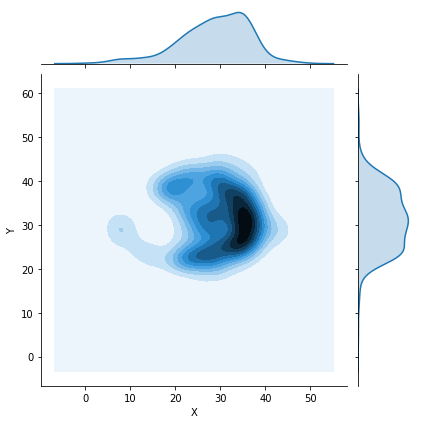

In [10]:
# sns.distplot(d['Content']['Points0']['CoordsXYZR'][:,])
data = d['Content']['Points0']['CoordsXYZR']
df = pd.DataFrame({'X': data[:,0], 'Y': data[:,1]})
sns.jointplot(x= 'X', y= 'Y',data=df, kind="kde");